In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df_labelled = pd.read_csv("../data/external/os_kernel_power_dataset.csv")

In [17]:
df_labelled

,Timestamp,Syscall,PID,Process_Name,Power_W,CPU_Usage_%,Mem_Usage_MB,Label
0,2025-05-05 10:00:00,read,1013,pm_monitor,4.17,85.53,393.18,Normal
1,2025-05-05 10:00:01,open,1067,kernel_thread,7.60,41.54,275.17,Normal
2,2025-05-05 10:00:02,open,1038,powerd,8.99,26.97,306.22,Anomaly
3,2025-05-05 10:00:03,read,1020,powerd,5.36,78.62,218.00,Normal
4,2025-05-05 10:00:04,ioctl,1056,powerd,6.43,38.44,301.01,Normal
...,...,...,...,...,...,...,...,...
995,2025-05-05 10:16:35,open,1060,netman,4.27,16.35,280.59,Normal
996,2025-05-05 10:16:36,write,1073,pm_monitor,5.62,7.75,216.82,Normal
997,2025-05-05 10:16:37,mmap,1021,powerd,5.30,47.76,135.26,Normal
998,2025-05-05 10:16:38,write,1042,loggerd,6.09,44.30,32.62,Normal


In [18]:
df_labelled.describe()

,PID,Power_W,CPU_Usage_%,Mem_Usage_MB
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,1051.120000,6.289940,46.920920,226.950390
std,28.935806,1.636318,25.733611,112.662044
min,1000.000000,4.010000,1.040000,30.530000
25%,1025.000000,5.157500,25.732500,133.557500
50%,1052.000000,5.990000,46.545000,225.740000
75%,1076.000000,6.772500,69.387500,322.020000
max,1100.000000,13.380000,100.000000,591.120000


In [19]:
df_labelled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Timestamp     1000 non-null   object 
 1   Syscall       1000 non-null   object 
 2   PID           1000 non-null   int64  
 3   Process_Name  1000 non-null   object 
 4   Power_W       1000 non-null   float64
 5   CPU_Usage_%   1000 non-null   float64
 6   Mem_Usage_MB  1000 non-null   float64
 7   Label         1000 non-null   object 
dtypes: float64(3), int64(1), object(4)
memory usage: 62.6+ KB


In [20]:
df_labelled.isna().sum()

Timestamp       0
Syscall         0
PID             0
Process_Name    0
Power_W         0
CPU_Usage_%     0
Mem_Usage_MB    0
Label           0
dtype: int64

In [21]:
df_labelled.isnull().sum()

Timestamp       0
Syscall         0
PID             0
Process_Name    0
Power_W         0
CPU_Usage_%     0
Mem_Usage_MB    0
Label           0
dtype: int64

In [22]:
df_labelled.ndim

2

In [23]:
df_labelled.duplicated().sum()

np.int64(0)

In [24]:
df_labelled.nunique()

Timestamp       1000
Syscall            7
PID              101
Process_Name       5
Power_W          428
CPU_Usage_%      932
Mem_Usage_MB     985
Label              2
dtype: int64

In [25]:
df_labelled.sample(5)

,Timestamp,Syscall,PID,Process_Name,Power_W,CPU_Usage_%,Mem_Usage_MB,Label
452,2025-05-05 10:07:32,execve,1066,powerd,6.20,69.73,355.56,Normal
585,2025-05-05 10:09:45,ioctl,1029,pm_monitor,4.80,54.06,330.71,Normal
876,2025-05-05 10:14:36,close,1046,loggerd,4.55,26.40,372.84,Normal
665,2025-05-05 10:11:05,read,1100,kernel_thread,6.35,36.38,114.89,Normal
291,2025-05-05 10:04:51,write,1014,loggerd,4.48,63.87,98.73,Normal


In [26]:
df_labelled.memory_usage

<bound method DataFrame.memory_usage of                Timestamp Syscall   PID   Process_Name  Power_W  CPU_Usage_%  \
0    2025-05-05 10:00:00    read  1013     pm_monitor     4.17        85.53   
1    2025-05-05 10:00:01    open  1067  kernel_thread     7.60        41.54   
2    2025-05-05 10:00:02    open  1038         powerd     8.99        26.97   
3    2025-05-05 10:00:03    read  1020         powerd     5.36        78.62   
4    2025-05-05 10:00:04   ioctl  1056         powerd     6.43        38.44   
..                   ...     ...   ...            ...      ...          ...   
995  2025-05-05 10:16:35    open  1060         netman     4.27        16.35   
996  2025-05-05 10:16:36   write  1073     pm_monitor     5.62         7.75   
997  2025-05-05 10:16:37    mmap  1021         powerd     5.30        47.76   
998  2025-05-05 10:16:38   write  1042        loggerd     6.09        44.30   
999  2025-05-05 10:16:39    open  1064         powerd     5.55        54.48   

     Mem_Us

In [27]:
df_labelled['Timestamp'] = pd.to_datetime(df_labelled['Timestamp'])


/var/folders/fb/c7ny9c1x1cz9sf687_4xwrrm0000gn/T/ipykernel_36890/175493914.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_labelled, x='Label', palette='Pastel1')


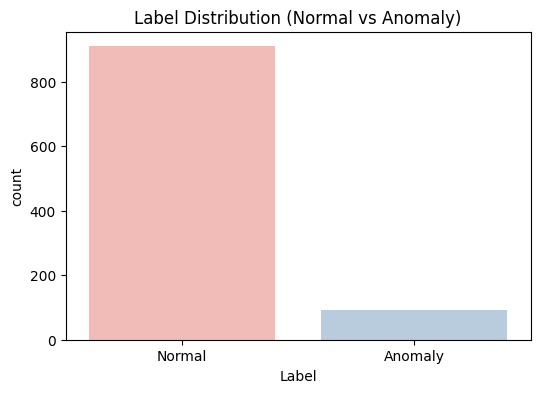

In [28]:
# ==========================================
# 4. LABEL DISTRIBUTION
# ==========================================
plt.figure(figsize=(6,4))
sns.countplot(data=df_labelled, x='Label', palette='Pastel1')
plt.title("Label Distribution (Normal vs Anomaly)")
plt.show()



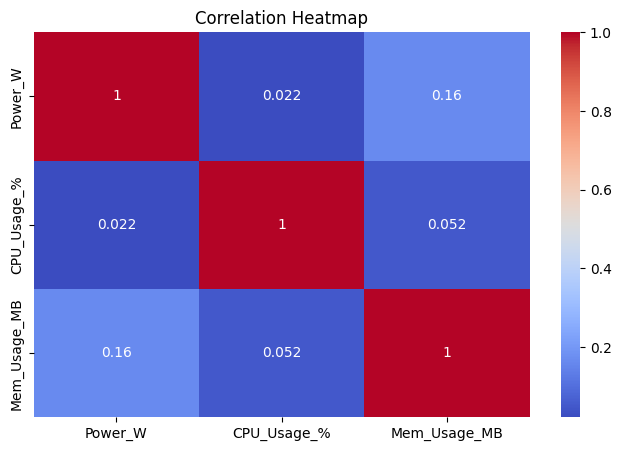

In [29]:
# ==========================================
# 5. CORRELATION HEATMAP
# ==========================================
plt.figure(figsize=(8,5))
sns.heatmap(df_labelled[['Power_W','CPU_Usage_%','Mem_Usage_MB']].corr(),
            annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()



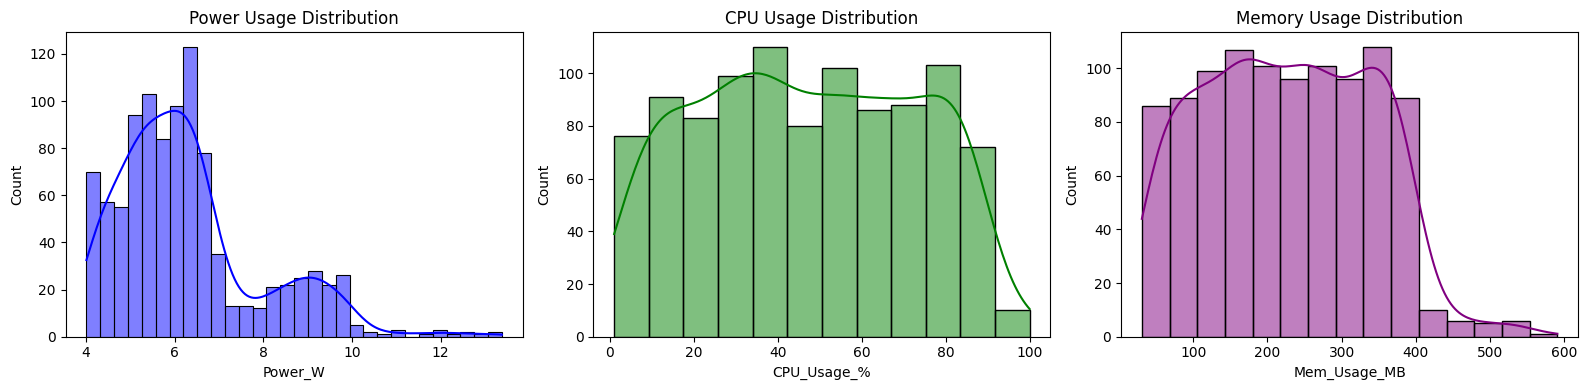

In [30]:
# ==========================================
# 6. FEATURE DISTRIBUTIONS
# ==========================================
fig, axes = plt.subplots(1, 3, figsize=(16,4))

sns.histplot(df_labelled['Power_W'], kde=True, color='blue', ax=axes[0])
axes[0].set_title("Power Usage Distribution")

sns.histplot(df_labelled['CPU_Usage_%'], kde=True, color='green', ax=axes[1])
axes[1].set_title("CPU Usage Distribution")

sns.histplot(df_labelled['Mem_Usage_MB'], kde=True, color='purple', ax=axes[2])
axes[2].set_title("Memory Usage Distribution")

plt.tight_layout()
plt.show()



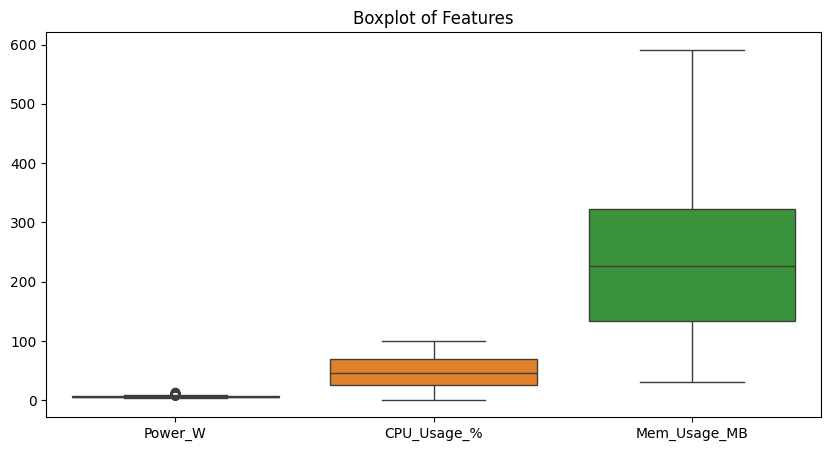

In [31]:
# ==========================================
# 7. BOXPLOTS — CHECK OUTLIERS
# ==========================================
plt.figure(figsize=(10,5))
sns.boxplot(data=df_labelled[['Power_W','CPU_Usage_%','Mem_Usage_MB']])
plt.title("Boxplot of Features")
plt.show()



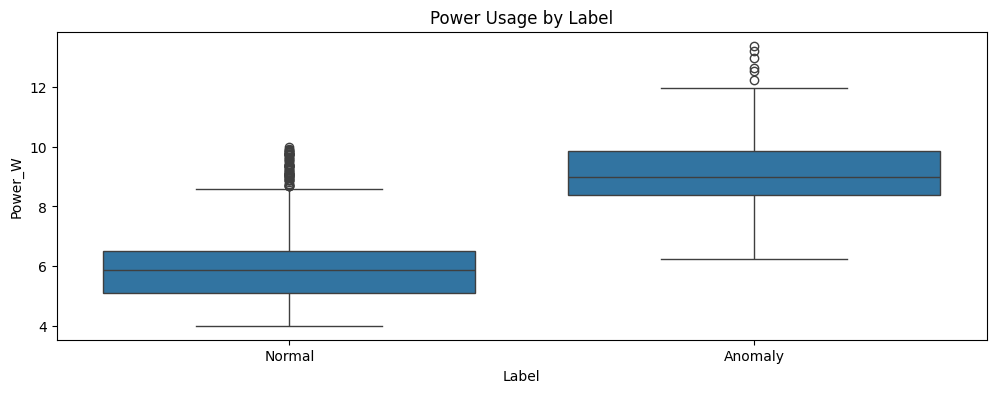

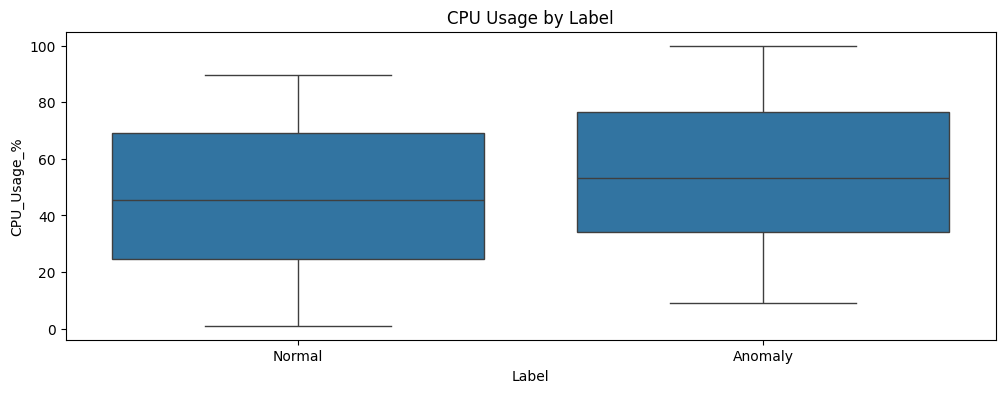

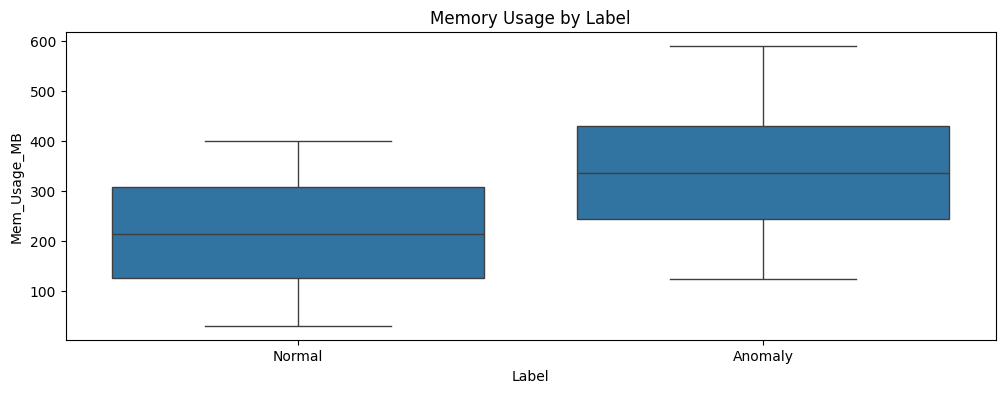

In [32]:
# ==========================================
# 8. ANALYSIS BY LABEL
# ==========================================
plt.figure(figsize=(12,4))
sns.boxplot(data=df_labelled, x='Label', y='Power_W')
plt.title("Power Usage by Label")
plt.show()

plt.figure(figsize=(12,4))
sns.boxplot(data=df_labelled, x='Label', y='CPU_Usage_%')
plt.title("CPU Usage by Label")
plt.show()

plt.figure(figsize=(12,4))
sns.boxplot(data=df_labelled, x='Label', y='Mem_Usage_MB')
plt.title("Memory Usage by Label")
plt.show()




🔹 Mean values by process:
                Power_W  CPU_Usage_%  Mem_Usage_MB
Process_Name                                      
kernel_thread  8.385737    43.370158    220.958000
loggerd        5.656114    47.914197    228.299171
netman         5.651070    47.457861    232.797166
pm_monitor     5.731889    48.486728    224.324424
powerd         6.124178    47.121643    228.615775


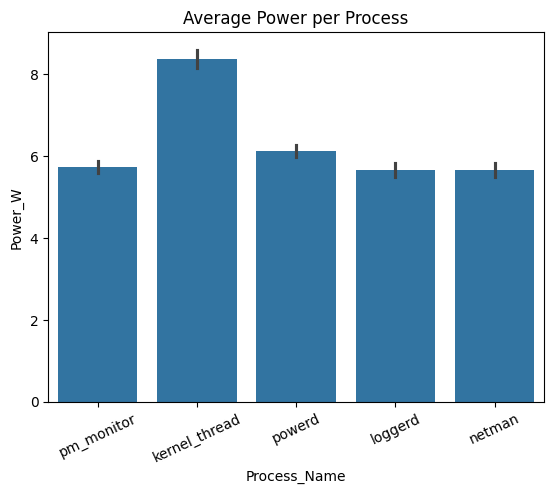

In [33]:
# ==========================================
# 9. GROUP BY PROCESS
# ==========================================
print("\n🔹 Mean values by process:")
print(df_labelled.groupby("Process_Name")[["Power_W", "CPU_Usage_%", "Mem_Usage_MB"]].mean())

sns.barplot(data=df_labelled, x='Process_Name', y='Power_W')
plt.title("Average Power per Process")
plt.xticks(rotation=25)
plt.show()




🔹 Mean values by syscall:
          Power_W  CPU_Usage_%  Mem_Usage_MB
Syscall                                     
close    6.273214    49.721429    241.861714
execve   6.355310    44.677448    231.131103
ioctl    6.213933    46.689733    225.925400
mmap     6.383111    48.715037    225.089333
open     6.319928    44.537754    222.343768
read     6.126600    47.578933    228.964867
write    6.374789    46.610211    213.180986


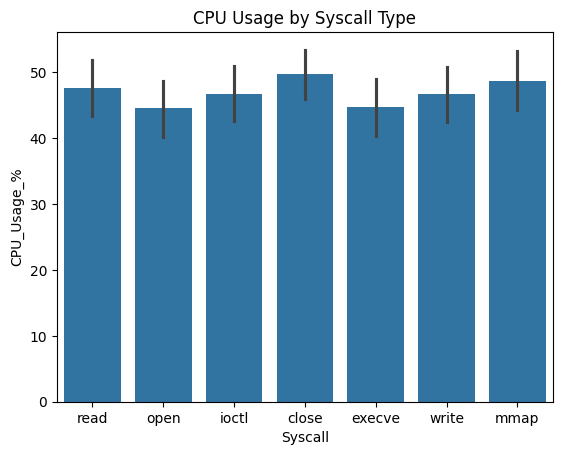

In [34]:
# ==========================================
# 10. GROUP BY SYSCALL
# ==========================================
print("\n🔹 Mean values by syscall:")
print(df_labelled.groupby("Syscall")[["Power_W", "CPU_Usage_%", "Mem_Usage_MB"]].mean())

sns.barplot(data=df_labelled, x='Syscall', y='CPU_Usage_%')
plt.title("CPU Usage by Syscall Type")
plt.show()



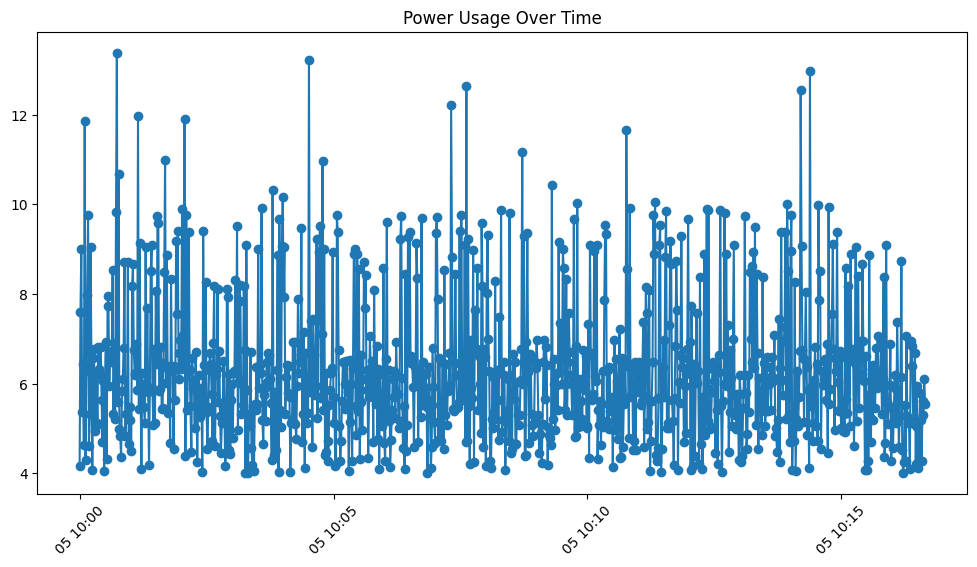

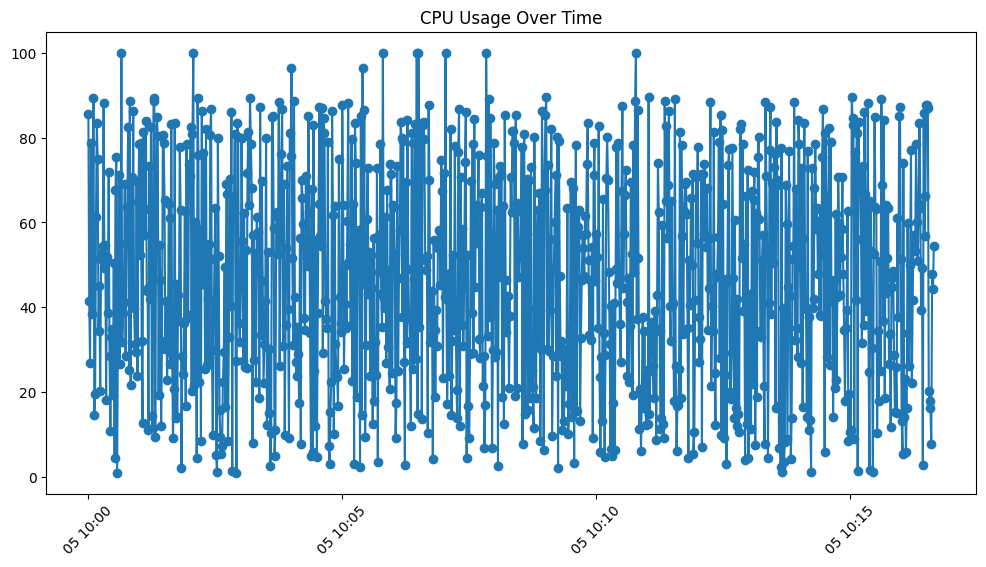

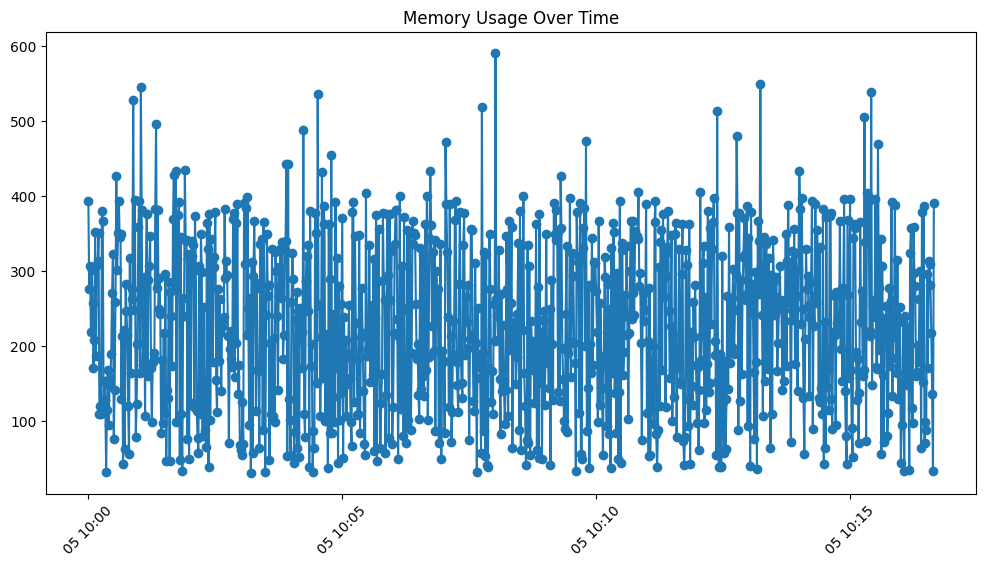

In [35]:
# ==========================================
# 11. TIME SERIES TREND
# ==========================================
plt.figure(figsize=(12,6))
plt.plot(df_labelled['Timestamp'], df_labelled['Power_W'], marker='o')
plt.title("Power Usage Over Time")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12,6))
plt.plot(df_labelled['Timestamp'], df_labelled['CPU_Usage_%'], marker='o')
plt.title("CPU Usage Over Time")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12,6))
plt.plot(df_labelled['Timestamp'], df_labelled['Mem_Usage_MB'], marker='o')
plt.title("Memory Usage Over Time")
plt.xticks(rotation=45)
plt.show()

In [38]:
import subprocess

pid = 12345
cmd = ["sudo", "dtrace", "-n", f'syscall:::entry /pid == {pid}/ {{ printf("%s\\n", probefunc); }}']
with subprocess.Popen(cmd, stdout=subprocess.PIPE, text=True) as proc:
    try:
        for line in proc.stdout:
            print(line.strip())
    except KeyboardInterrupt:
        proc.terminate()

sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
